# Importing libraries

In [12]:
import numpy as np
import pandas as pd

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#  Importing Dataset

In [14]:
data= pd.read_csv('C:\\Users\\PILLA ROSHINI DEVI\\Desktop\\udemy\\15-Decision-Trees-and-Random-Forests\\loan_data.csv')

In [15]:
data.shape

(9578, 14)

In [16]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [17]:
data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

# Visualization

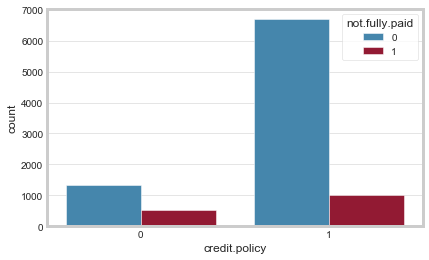

In [18]:
sns.set_style('whitegrid')
sns.countplot(data['credit.policy'],hue = data['not.fully.paid'])

Text(0.5, 0, 'FICO')

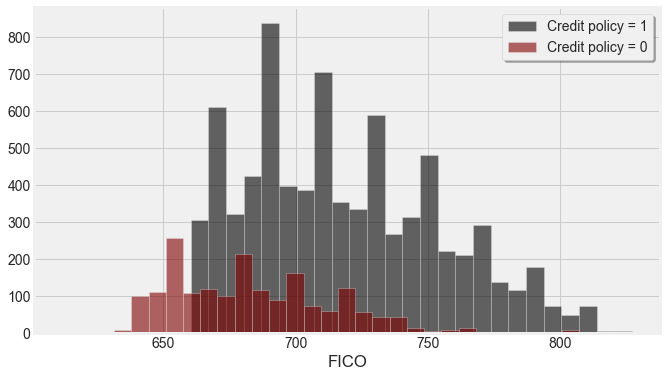

In [19]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
data[data['credit.policy']==1]['fico'].hist(alpha = 0.6,bins = 30,color = 'black',label = 'Credit policy = 1')
data[data['credit.policy']==0]['fico'].hist(alpha = 0.6,bins = 30,color = 'maroon',label = 'Credit policy = 0')
plt.legend(fancybox = 'True',shadow = 'True')
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

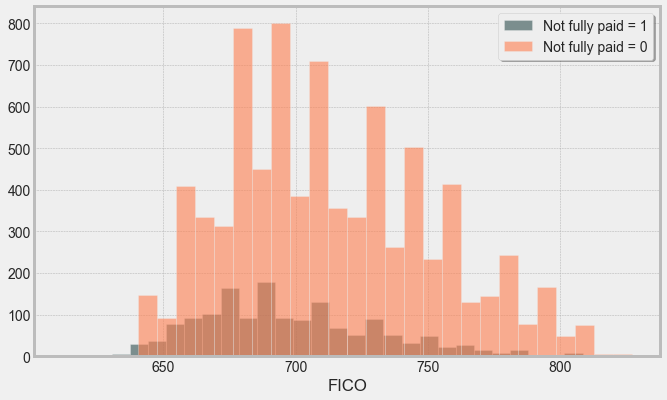

In [20]:
plt.style.use('bmh')
plt.figure(figsize=(10,6))
data[data['not.fully.paid']==1]['fico'].hist(alpha = 0.6,color = 'darkslategray',bins = 30,label = 'Not fully paid = 1')
data[data['not.fully.paid']==0]['fico'].hist(alpha = 0.6,color = 'coral',bins = 30,label = 'Not fully paid = 0')
plt.legend(shadow = 'True')
plt.xlabel ('FICO')

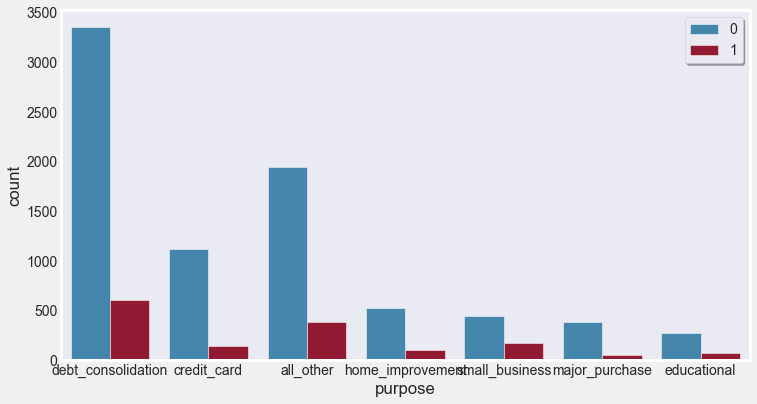

In [21]:
plt.figure(figsize=(11,6))
sns.set_style('dark')
sns.countplot(data['purpose'],hue = data['not.fully.paid'])
plt.legend(shadow = True)

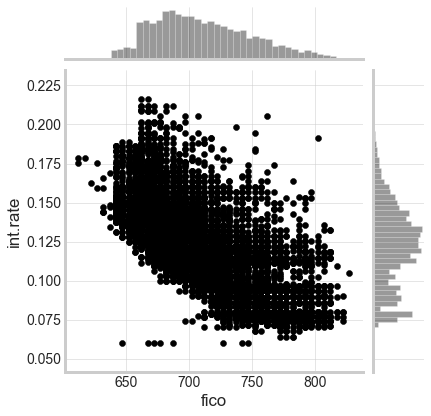

In [79]:
sns.set_style('whitegrid')
sns.jointplot(data['fico'],data['int.rate'],color = 'black')

# Dealing with categorical data

In [23]:
data['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [24]:
Purpose = pd.get_dummies(data.purpose)

In [25]:
Purpose.head()

,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [26]:
final_data = pd.concat([Purpose,data],axis = 1)
final_data.drop(['purpose'],axis = 1,inplace = True)

In [27]:
final_data.isnull().sum()

all_other             0
credit_card           0
debt_consolidation    0
educational           0
home_improvement      0
major_purchase        0
small_business        0
credit.policy         0
int.rate              0
installment           0
log.annual.inc        0
dti                   0
fico                  0
days.with.cr.line     0
revol.bal             0
revol.util            0
inq.last.6mths        0
delinq.2yrs           0
pub.rec               0
not.fully.paid        0
dtype: int64

# Train Test Split

In [60]:
x =final_data.iloc[:,0:19]
y = final_data['not.fully.paid']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 40,test_size = 0.30)

# Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
model = DecisionTreeClassifier()

In [65]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [66]:
predict_val = model.predict(x_test)

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [68]:
confusion_matrix(y_test,predict_val)

array([[1967,  421],
       [ 367,  119]], dtype=int64)

In [69]:
accuracy_score(y_test,predict_val)

0.7258176757132916

In [70]:
print(classification_report(y_test,predict_val))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      2388
           1       0.22      0.24      0.23       486

   micro avg       0.73      0.73      0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.74      0.73      0.73      2874



#  Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
model2 = RandomForestClassifier()

In [73]:
model2.fit(x_train,y_train)

C:\Users\PILLA ROSHINI DEVI\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [76]:
predict_val2 = model2.predict(x_test)

In [77]:
accuracy_score(y_test,predict_val2)

0.824982602644398